In [1]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPool2D, Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator #for data augmentation
from tensorflow.keras.callbacks import ReduceLROnPlateau #for changing learning rate dynamically
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
# checking the count of images present in the dataset
total_images = 0
root_dir = "../input/dataset1/train"
for i in os.listdir(root_dir):
    print("Total no. of images present in",i,"are:",len(os.listdir(root_dir+"/"+i)))
    total_images+=len(os.listdir(root_dir+"/"+i))
    
print("total number of images in the dataset:", total_images)

Total no. of images present in Sample060 are: 40
Total no. of images present in Sample014 are: 40
Total no. of images present in Sample011 are: 40
Total no. of images present in Sample041 are: 40
Total no. of images present in Sample025 are: 40
Total no. of images present in Sample049 are: 40
Total no. of images present in Sample010 are: 40
Total no. of images present in Sample017 are: 40
Total no. of images present in Sample032 are: 40
Total no. of images present in Sample005 are: 40
Total no. of images present in Sample034 are: 40
Total no. of images present in Sample031 are: 40
Total no. of images present in Sample003 are: 40
Total no. of images present in Sample009 are: 40
Total no. of images present in Sample002 are: 40
Total no. of images present in Sample052 are: 40
Total no. of images present in Sample035 are: 40
Total no. of images present in Sample018 are: 40
Total no. of images present in Sample004 are: 40
Total no. of images present in Sample020 are: 40
Total no. of images 

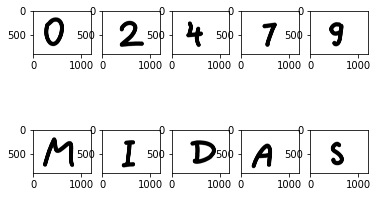

In [3]:
# plotting various images from the dataset.
plt.subplot(2, 5, 1)
plt.imshow(plt.imread(root_dir+"/Sample001/img001-001.png"))

plt.subplot(2,5,2)
plt.imshow(plt.imread(root_dir+"/Sample003/img003-002.png"))

plt.subplot(2,5,3)
plt.imshow(plt.imread(root_dir+"/Sample005/img005-001.png"))

plt.subplot(2,5,4)
plt.imshow(plt.imread(root_dir+"/Sample008/img008-002.png"))

plt.subplot(2,5,5)
plt.imshow(plt.imread(root_dir+"/Sample010/img010-002.png"))

plt.subplot(2,5,6)
plt.imshow(plt.imread(root_dir+"/Sample023/img023-001.png"))

plt.subplot(2,5,7)
plt.imshow(plt.imread(root_dir+"/Sample019/img019-001.png"))

plt.subplot(2,5,8)
plt.imshow(plt.imread(root_dir+"/Sample014/img014-001.png"))

plt.subplot(2,5,9)
plt.imshow(plt.imread(root_dir+"/Sample011/img011-001.png"))

plt.subplot(2,5,10)
plt.imshow(plt.imread(root_dir+"/Sample029/img029-002.png"))


plt.show()

(900, 1200, 3)


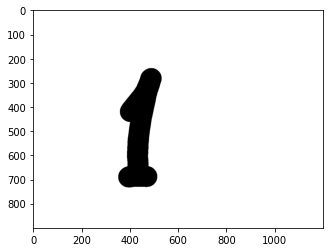

In [4]:
img = plt.imread(root_dir+"/Sample002/img002-001.png")
print(img.shape)
plt.imshow(img)
plt.show()

In [5]:
# checking the min and max pixel value. It is a good practise to normalize the pixel values
print("minimum pixel value of image:",img.min())
print("maximum pixel value of image:",img.max())

minimum pixel value of image: 0.0
maximum pixel value of image: 1.0


Conclusions of data analysis:

1. For all the 62 categories we only have 40 images per category. Depending on the performance of our model, we might need to apply data augmentation techniques to achieve more accuracy on the test set and reduce overfitting.
2. Initially, the images are of the dimension 900x1200x3. As we can see from the random samples that we have printed, there is a lot of unnecessary extra space in the images. This padding(white space) is mostly on the right side of the image. We can remove this extra space which would improve our computation speed.
3. Normalizing the pixel values ensures that input parameters have a uniform distribution and thus helps in faster convergence.[1] Since the pixel values are already normalized we don't need to modify them.
4. Large image size implies added noise and variance that the neural network has to deal with. Which in turn also means that we would need more layers to achieve greater accuracy. [2] 
5. Since most of the input features are aligned towards the centre, we can take a square crop of the centre and then scale down the image. This would also help us to tackle with problems mentioned in point 2 and point 4.[3]
6. Using downsized images helps to reduce the error rate in a small amount [9]

It would optimal to apply the above transformations to the image while loading it into the NumPy array. Another alternate would have been to either overwrite the images with their transformed version or create a new folder. Both of these methods are not comparitively efficient as we might end up either losing the data or unnecessarily increase the storage requirement.

## Loading the data and assigning the labels
For model training, we would require a list(X) in which our images are stored and another list(y) in which the class of respective images are stored.
Since the images are organised folder wise, we need to access the images from these folders append them into list X and subsequently append its class to the list Y.

Data transformations, that were mentioned above, will be applied after storing the data into the list

Since retrieving data and transforming it is more accessible through the list, I have chosen to use that. The data type will be changed to a NumPy array after applying all the transformations.


Outline of data stored in the folders:


*   Sample001-Sample010: digits from 0 to 9
*   Sample011-Sample036: upper case alphabets a-z
*   Sample037-Sample062: small case alphabets A-Z

In [6]:
X = [] #list for storing image arrays
y = [] # list for storing the image labels

In [7]:
# storing digits from 0 to 9 first
label = 0 # count will be used to store the respective label
for i in sorted(os.listdir(root_dir)): 
    for j in os.listdir(root_dir + "/" + i): # accessing the folder
        X.append(cv2.imread(root_dir+"/" + i + "/" + j)) # accessing images in the respective folder
        y.append(label)

    label+=1 #incrementing the count/label 
    if(label==10): break # if all the images from 0 to 9 have been stored then break out of the loop
    

400
400
0 2 9


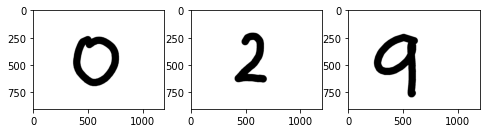

In [8]:
# sanity check
print(len(X))
print(len(y))

plt.figure(figsize = (8, 2))

plt.subplot(1,3,1)
plt.imshow(X[0])

plt.subplot(1,3,2)
plt.imshow(X[80])

plt.subplot(1,3,3)
plt.imshow(X[399])


print(y[0],y[80],y[399])

In [9]:
# storing upper case alphabets (A-Z)
count = 65  #ascii value of A. We'll go till 90 i.e ascii value of Z

for i in sorted(os.listdir(root_dir))[10:]: #accessing folder after Sample010 i.e folders after the digit 9
    for j in os.listdir(root_dir + "/" + i):
        X.append(cv2.imread(root_dir+"/" + i + "/" + j))
        y.append(label)
        
    count+=1
    label+=1
    if(count==78): break #if we have accessed the Z folder then break the loop      

In [10]:
count = 78
for i in sorted(os.listdir(root_dir))[23:]: #accessing folder after Sample010 i.e folders after the alphabet m
    for j in os.listdir(root_dir + "/" + i):
        X.append(cv2.imread(root_dir+"/" + i + "/" + j))
        y.append(label)
        
    count+=1
    label+=1
    if(count==91): break #if we have accessed the Z folder then break the loop 

1440
1440
10 22 23 35


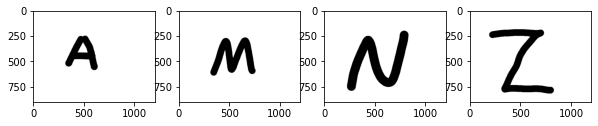

In [11]:
# sanity check
print(len(X))
print(len(y))

plt.figure(figsize = (10, 2))


plt.subplot(1,4,1)
plt.imshow(X[401])

plt.subplot(1,4,2)
plt.imshow(X[880])


plt.subplot(1,4,3)
plt.imshow(X[959])


plt.subplot(1,4,4)
plt.imshow(X[1439])

print(y[401],y[880], y[959],y[1439])

In [12]:
# storing lower case alphabets (a-z)
count = 97  #ascii value of A. We'll go till 122 i.e ascii value of z

for i in sorted(os.listdir(root_dir))[36:]:#accessing folder after Sample036 i.e folders after the upper case alphabet Z
    for j in os.listdir(root_dir + "/" + i):        
        X.append(cv2.imread(root_dir+"/" + i + "/" + j))
        y.append(label)
            
        
    count+=1
    label+=1
    if(count==110): break #if we have accessed the z folder then break the loop  


In [13]:
count = 110
for i in sorted(os.listdir(root_dir))[49:]: #accessing folder after Sample048 i.e folders after the lower case alphabet m 
    for j in os.listdir(root_dir + "/" + i):
        X.append(cv2.imread(root_dir+"/" + i + "/" + j))
        y.append(label)
    
        
    count+=1
    label+=1
    if(count==123): break #if we have accessed the z folder then break the loop     

2480
2480
36 48 49 61


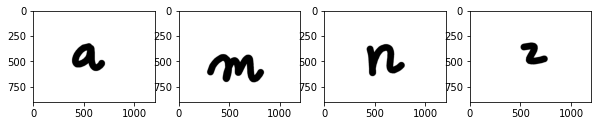

In [14]:
#sanity check
print(len(X))
print(len(y))

plt.figure(figsize = (10, 2))

plt.subplot(1,4,1)
plt.imshow(X[1440])

plt.subplot(1,4,2)
plt.imshow(X[1959])

plt.subplot(1,4,3)
plt.imshow(X[1960])


plt.subplot(1,4,4)
plt.imshow(X[2479])


print(y[1440],y[1959], y[1960],y[2479])

Now, that we have organised our images, we'll apply various image transformations to the images for efficient storage and computation.
As mentioned earlier, we'll take a centre square crop of the images. This allows us to remove unnecessary padding, help the CNN to focus on important features and decrease the computation resources.

(224, 224, 3)
<class 'numpy.ndarray'>


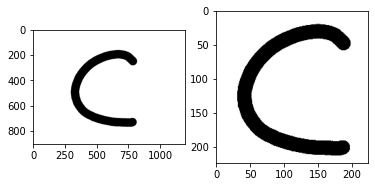

In [15]:
'''
For testing I am applying the above mentioned transformations to a single image
(to keep things simple for me, I'll crop the images by taking an approximate guess :P)
We will also have to reduce the size of the image because the current size will consume a lot of resources

'''

#test_img = X[60]
# modified_img = cv2.cvtColor(X[60], cv2.COLOR_BGR2GRAY)
# modified_img = modified_img[100:800,200:900]

original_img = X[480]

modified_img = original_img[100:800,200:900]

scale_percent = 32 # scale down percentage
width = int(modified_img.shape[1] * scale_percent / 100)
height = int(modified_img.shape[0] * scale_percent / 100)

dsize = (width, height)
modified_img = cv2.resize(modified_img, dsize)
modified_img = np.resize(modified_img,(modified_img.shape[0],modified_img.shape[1],3))

print(modified_img.shape)
print(type(modified_img))

# plotting the original and the sacled down image
plt.subplot(1,2,1)
plt.imshow(original_img)

plt.subplot(1,2,2)
plt.imshow(modified_img,cmap='gray')


plt.show()

In [16]:
# Applying data transformation to all the images
for i in range(len(X)):
    
    # cropping out the extra space
    X[i] = X[i][100:800,200:900]
    
    scale_percent = 32 # scale down percentage
    
    # setting the new width and height of the images
    width = int(X[i].shape[1] * scale_percent / 100)
    height = int(X[i].shape[0] * scale_percent / 100)

    dsize = (width, height)

    # resizing the image using cv2
    X[i] = cv2.resize(X[i], dsize)
    X[i] = np.resize(X[i],(X[i].shape[0],X[i].shape[1],3))



(224, 224, 3)


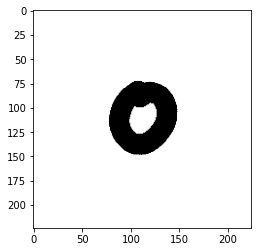

In [17]:
# sanity check
print(X[10].shape)
plt.imshow(X[10],cmap="gray")
plt.show()

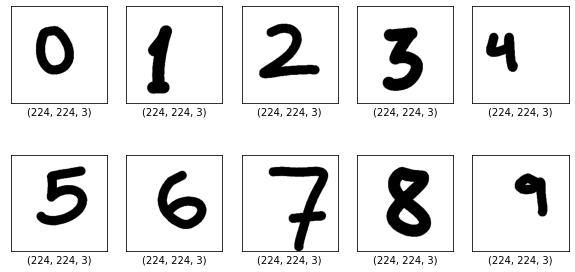

In [18]:
# plotting the digits after applying the transformations
plt.figure(figsize = (10, 5))

count = 0
for i in range(14, 399, 40):
    plt.subplot(2, 5, count + 1)
    plt.imshow(X[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(X[i].shape)
    count+=1
    

By randomly plotting the digits we can observe that few of the digits have been cropped. This error in a few images is considerable as scaling-down consumes fewer resources and helps the model during the retraining in part 2 and 3.

In [19]:
# sanity check (checking if shape of the image has changed or not)
import random
for i in range(5):#checking for 5 random images
    print(X[random.randint(0,2479)].shape)


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [20]:
# splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, test_size=0.3)

In [21]:
# creating labels
from sklearn.preprocessing import LabelBinarizer
LB = LabelBinarizer()
y_train = LB.fit_transform(y_train)
y_test = LB.fit_transform(y_test)

## Data Augmentation

A dataset of 2480 images might lead to overfitting. Thus, to increase the dataset we apply some data augmentation techniques. 
* Various studies[9][11] have shown that applying data transformations like rotation, translating by width and height shifts and shearing prove to be effective and helps to achieve better generalization.
* We cannot use techniques like flipping as it would change the context.
* We can also apply more complex things like generating images using encoder-decoder networks or GANs.
* To apply the above-mentioned data augmentation techniques, I have used the Keras library of ImageDataGenerator. It creates various augmentations of the images in every epoch. The augmentation is done during the training phase itself. It helps us to reduce the storage.


In [22]:
# modifiying the type and shape of input images.
X_train = np.array(X_train)
X_train = X_train.reshape(-1,224,224,3)

X_test = np.array(X_test)
X_test = X_test.reshape(-1,224,224,3)

In [23]:
# sanity check
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1736, 224, 224, 3)
(744, 224, 224, 3)
(1736, 62)
(744, 62)


## ---------- END OF DATA PREPROCESSING ----------

## Model building. 
These were the factors that I considered while model building and training:

1. Conventional and famous architectures like LeNet[4], AlexNet[5] and VGG16[6] have shown high performance on various image classification problems. These models use consequent layers of convolution and pooling pairs while increasing the number of filters in each subsequent layer. They finally flatten the output and send it into 3 or 4 dense layers and end it by taking the output from the dense layer with a softmax activation function. I have used a similar structure for classifying images into 62 categories.

2. There is a lot of difference in the dimensions of images in part1 (1200x700) and part2/part3 (28x28). Due to this reason, we cannot include many layers of convolution and max-pooling as it would drastically downsize the images of size 28x28 and make this model unfit to be re-trained on those images. On the contrary, we would want to include more convolution so that we could maximize the feature extraction of the 1200x700 images. Therefore, we have to create a balance so that we could efficiently manage both sizes of images. Considering this point, I have chosen to limit these layers to 3 sets of convolution and max-pooling layers.

3. Conventional architectures like AlexNet and VGG16 use a kernel size of 3x3 and have multiple convolution layers. Since my model only has 3 layers of convolution it creates a problem. This is because the units after flattening become around 40 lakh and it becomes difficult to condense this information into a dense layer of limited units. If we use a kernel of 3x3 then we would lose a lot of information upon sending it to a dense layer. Therefore, I have used a bigger kernel size at the beginning. 

4. Again, the difference in image size is the reason why I have used a limited number of dense layers with a limited number of units in them.

5. Since we have a limited number of training images, the model has a high probability of overfitting the data. To prevent this I have used dropout[7] layers in between.

6. For preventing the model from stagnating at the local minima, I have used Keras's ReduceLROnPlateau library. I have set it to monitor the validation loss so that it changes the learning rate of the model dynamically, helping the model to reach the global minima. This also helps in faster convergence. By randomly plotting the digits we can observe that few of the digits have been cropped. This error in a few images is considerable as scaling-down consumes fewer resources and helps the model when we have to re-train it in part 2/3.

In [24]:
# Number of classes.
num_classes = 62

In [25]:
# initializing the model
model = Sequential()

# layer 1
model.add(Conv2D(filters = 64, kernel_size = (5, 5), strides = 1, activation = 'relu', input_shape = (224, 224, 3)))

# layer 2
model.add(MaxPool2D(pool_size = (3, 3)))
model.add(Dropout(0.2))

# layer 3
model.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, activation = 'relu'))

# layer 4
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# layer 5
model.add(Conv2D(filters = 256, kernel_size = (2, 2), strides = 1, activation = 'relu'))
# layer 6
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# layer 7
model.add(Flatten())

# layer 8
model.add(Dense(512, activation = 'relu', use_bias=False))
model.add(Dropout(0.2))

# layer 9
model.add(Dense(256, activation = 'relu', use_bias=False))
model.add(Dropout(0.2))

# layer 10
model.add(Dense(128, activation = 'relu', use_bias=False))

# output layer
model.add(Dense(num_classes, activation = 'softmax'))     

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 256)       1

In [26]:
# initializing keras object to dynamically change the learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor = 0.2, patience = 2, mode='min')

In [27]:
# Image augmentation object
datagen = ImageDataGenerator(width_shift_range = (-10,10),           
                             height_shift_range = (-10,10),
                             rotation_range = 10)

# compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# checkpoint
checkpoint_filepath = '/checkpoint'
model_checkpoint_callback = ModelCheckpoint(
                                            filepath=checkpoint_filepath,
                                            save_weights_only=False,
                                            monitor='accuracy',
                                            mode='max',
                                            save_best_only=True)

# training the model
hist = model.fit(datagen.flow(X_train, y_train, batch_size=32),
          steps_per_epoch=len(X_train) / 32, epochs = 100, callbacks=[reduce_lr, model_checkpoint_callback],validation_data = (X_test,y_test))

Epoch 1/100
54/54 [==============================] - 21s 328ms/step - loss: 178.3904 - accuracy: 0.0177 - val_loss: 4.1272 - val_accuracy: 0.0242
Epoch 2/100
54/54 [==============================] - 18s 338ms/step - loss: 4.1256 - accuracy: 0.0205 - val_loss: 4.0955 - val_accuracy: 0.0323
Epoch 3/100
54/54 [==============================] - 18s 325ms/step - loss: 4.0786 - accuracy: 0.0304 - val_loss: 4.0068 - val_accuracy: 0.0349
Epoch 4/100
54/54 [==============================] - 17s 318ms/step - loss: 3.9810 - accuracy: 0.0450 - val_loss: 3.6974 - val_accuracy: 0.0954
Epoch 5/100
54/54 [==============================] - 18s 330ms/step - loss: 3.7604 - accuracy: 0.0833 - val_loss: 3.3920 - val_accuracy: 0.1667
Epoch 6/100
54/54 [==============================] - 17s 319ms/step - loss: 3.3830 - accuracy: 0.1739 - val_loss: 2.9628 - val_accuracy: 0.2312
Epoch 7/100
54/54 [==============================] - 18s 337ms/step - loss: 3.1317 - accuracy: 0.2056 - val_loss: 2.6416 - val_accurac

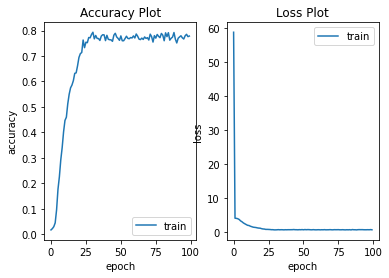

In [28]:
# plotting the training and accuracy of the model

plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.title("Accuracy Plot")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'])

plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.title("Loss Plot")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'])

plt.show()

In [29]:
# accuracy and loss of the model
score = model.evaluate(X_test, y_test)
print("Testing loss : ", score[0])
print("Testing accuracy : ", score[1])

24/24 [==============================] - 0s 11ms/step - loss: 1.2446 - accuracy: 0.6989
Testing loss :  1.2445621490478516
Testing accuracy :  0.698924720287323


# Conclusion:
Intuitively, one would interpret the problem statement as a modified version of the handwritten digit recognition problem. However, it is more complex as we have a higher number of classes to classify and very little data to train. To tackle this problem, we would want to build a deep neural network like AlexNet[6] but can't do so as such deep networks expect a large dataset and are used to extract large features from the input. Additionally, we have to limit the number of convolution layers since the input dimensions vary in different parts. Therefore, to achieve maximum performance and build an efficient model which could be trained for all the parts we have to utilize other techniques like data augmentation, larger kernel size, dynamic learning rate and dropout. By using these techniques we can prevent overfitting and underfitting of the model and achieve higher accuracy and lower loss on the training and testing datasets. The current performance that is achieved by the model can be attributed to the following reasons:
1. A dataset of 2480 images is extremely low for a convolution network as it causes overfitting of the model. Data augmentation techniques are also not able to help the model to achieve higher performances(eg. 90+ accuracy) as the pool of images is less.
2. The number of classes to be predicted are high. Given the lower number of training images and a constraint on the number of convolution layers, the model fails to extract enough features to distinguish amongst the 62 classes. 
3. The classes are ambiguous as some of them have similar structure and features. For eg: l and 1, 0(digit) and o(small o) and O(capital O),c(small) and C(capital),  z(small) and Z(capital) etc. This problem is aggravated as the images are scaled-down.


The following things can be used to improve the model performance
1. For achieving high performance we need to develop more images. These could be scrapped from the internet or any handwritten documents.
2. We can divide the classes into 3 categories(digits, small letters and capital letter) and generate output separately for all three categories. This might also solve the problem of ambiguity amongst various classes as mentioned above.

In [30]:
# saving the model
model.save('./part1_model')

In [31]:
# zipping the output files
!tar -zcvf outputname.tar.gz /kaggle/working

tar: Removing leading `/' from member names
/kaggle/working/
/kaggle/working/__notebook_source__.ipynb
/kaggle/working/part1_model/
/kaggle/working/part1_model/assets/
/kaggle/working/part1_model/saved_model.pb
/kaggle/working/part1_model/variables/
/kaggle/working/part1_model/variables/variables.data-00000-of-00001
/kaggle/working/part1_model/variables/variables.index
tar: /kaggle/working: file changed as we read it


## Learning logs:
1. It is better to split data and append data in batches. Otherwise, we might encounter a runtime timeout error.

2. It is more optimal to use cv2 while reading the images. Reading with matplotlib consumers more than 12GB of RAM as it stores as a list. By reading images through cv2 the RAM utilization is reduced by 4GB. This happens because CV2 reads and stores the image as a NumPy array rather than a list.

3. By observing various samples we can conclude that most of the white space is towards the right of the images. A naive way of reducing the images would be to simply crop this space out by making an approximate guess. However, if we want an accurate analysis we can take the mean and standard deviation across each pixel of all the images and then reduce the image accordingly.[2] 

4. Taking input a batch of 700x700 images requires heavy computational resources and we eventually run out of GPU/RAM resource. Thus it is better to scale down images. 

5. I tried to apply batch normalization. Batch Normalization allows us to use much higher learning rates and be less careful about initialization. It also acts as a regularizer, in some cases eliminating the need for Dropout [8]. However, in our case, it significantly reduces the training and testing accuracy. This might be because we have a large number of classes to predict. Applying batch normalization layer restricts parameters, thus hindering the performance of the model.


6. In the end, a 3 layer CNN architecture with dropout layers gave me the best result on the current dataset of 2480 images. On training on 20 epochs, it gave a training accuracy of  0.99 and a training loss of 0.02084. On the small testing set, it gave an accuracy of 0.22 and 8.22. Making a few minor changes would not help. As the data is quite small, the model quickly overfits the data and eventually performs badly on the test set. Thus, for better performance, we have to apply data augmentation techniques to produce a bigger dataset.

7. Augmenting the data by using the ImageDataGenerator API of Keras helps us to improve the testing accuracy to more than 57% in 50 epochs. The test accuracy tends to saturate around 62%. This was the maximum accuracy that I could achieve on single-channel images.

8. Using a 3 channel image as the input gives better results. To prevent overfitting I have to add dropout layers.

9. A deep CNN fails as images in the MNIST dataset are very small. Therefore, I have to consider the shape of those images as well.

Citations:
1. [1]: https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/#:~:text=Normalize%20Pixel%20Values,-For%20most%20image&text=As%20such%20it%20is%20good,images%20can%20be%20viewed%20normally.
2. [2]: https://becominghuman.ai/image-data-pre-processing-for-neural-networks-498289068258#:~:text=Normalizing%20image%20inputs%3A%20Data%20normalization,faster%20while%20training%20the%20network.
3. [3]: https://datascience.stackexchange.com/questions/16601/reason-for-square-images-in-deep-learning
4.[4] LeCun et al., Gradient-based learning applied to document recognition (1998), Proc of the IEEE, November 1998
5. [5] Iandola, Forrest N., et al. "SqueezeNet: AlexNet-level accuracy with 50x fewer parameters and< 0.5 MB model size." arXiv preprint arXiv:1602.07360 (2016).
6. [6] Krizhevsky, Alex, Ilya Sutskever, and Geoffrey E. Hinton. "Imagenet classification with deep convolutional neural networks." Advances in neural information processing systems 25 (2012): 1097-1105.
7. [7] Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014). Dropout: A simple way to prevent neural networks from overfitting. Journal of Machine Learning Research, 15, 1929–1958.
8. [8] Ioffe, Sergey, and Christian Szegedy. “Batch normalization: Accelerating deep network training by reducing internal covariate shift.” arXiv preprint arXiv:1502.03167 (2015).
9. [9] Alonso-Weber, Juan Manuel, et al. "Handwritten digit recognition with pattern transformations and neural network averaging." International Conference on Artificial Neural Networks. Springer, Berlin, Heidelberg, 2013.
11. [10] Garcia de Alford, Adriana Solange, et al. "Reducing Age Bias in Machine Learning: An Algorithmic Approach." SMU Data Science Review 3.2 (2020): 11.
12. [11] Gu, Shanqing, Manisha Pednekar, and Robert Slater. "Improve Image Classification Using Data Augmentation and Neural Networks." SMU Data Science Review 2.2 (2019): 1.